In [1]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

import glob
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [32]:
def lorentzian(X,x0,c):
    return c**2/(np.pi*c*(c**2+(X-x0)**2))

def ODMRfit(X,a1,f1,w1,a2,f2,w2):
    return a1*lorentzian(X,f1,w1)+a2*lorentzian(X,f2,w2)

def pol(X,phi,theta,a):
    return a*(np.cos(X-phi)**2+(np.cos(theta)*np.sin(X-phi))**2)

In [129]:
-

In [119]:
def OrientPol(T):
    T[:,0] = T[:,0]*2*np.pi/360
    T[:,1] = T[:,1]+np.linspace(0,T[0,1]-T[-1,1],num=T.shape[0])
    
    opt1,cov1 = curve_fit(pol,T[:,0],T[:,1],p0=(0,np.pi/4,np.max(T[:,1])))

    plt.polar(T[:,0],T[:,1],'ko')
    plt.polar(T[:,0],pol(T[:,0],*opt1),'r-')

    print "Phi: %2f +/- %2f" % (opt1[0]*180/np.pi,np.sqrt(np.diag(cov1))[0]*180/np.pi)
    print "Theta: %2f or +/- %2f" % (opt1[1]*180/np.pi,np.sqrt(np.diag(cov1))[1]*180/np.pi)
    print "Phi(naive): %2f" % (T[np.argmin(T[:,1]),0]*180/np.pi-90)
    print "Theta(naive): %2f" % (np.arccos(np.sqrt(np.min(T[:,1])/np.max(T[:,1])))*180/np.pi)

X field: 8.06 +/- 0.03 mT 
Y field: 5.79 +/- 0.05 mT 
Z field: 4.14 +/- 0.05 mT
B: 11.34 +/- 0.09
Phi: 35.66 +/- 1.09
Theta: 61.08 or 118.92


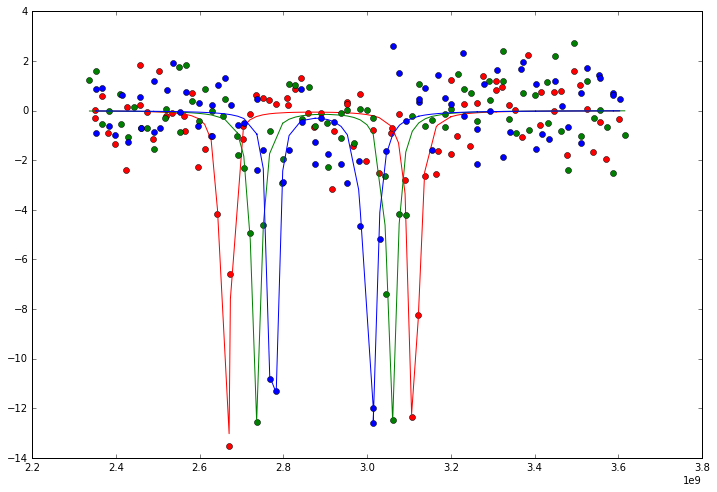

In [124]:
D1_X = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-25-16\Nabond ND on CPW 10mW ODMR position 2 x141 y111 B0_5 T0.txt')
D1_Y = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-25-16\Nabond ND on CPW 10mW ODMR position 2 x141 y111 B0_5 T90.txt')
D1_Z = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-25-16\Nabond ND on CPW 10mW ODMR position 2 x141 y111  X15_4 B0_5 T0.txt')
OrientODMR(D1_X,D1_Y,D1_Z)


Phi: 49.304698 +/- 0.385190
Theta: 49.896217 or 130.103783 +/- 0.340331
Phi(naive): 47.528000
Theta(naive): 52.872979 or 127.127021


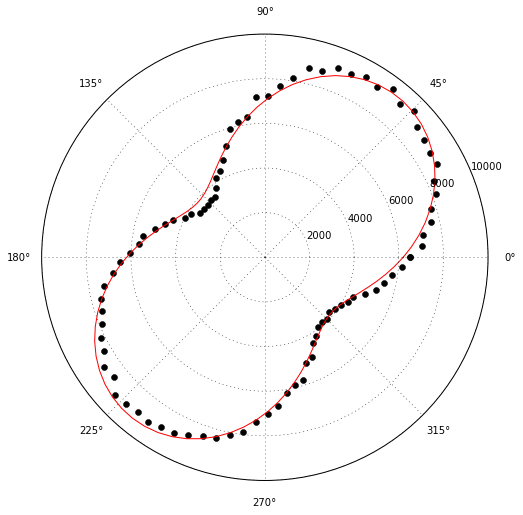

In [120]:
T1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-25-16\Nabond ND on CPW 1mW ODMR position 2 x141 y111 B0 Rotor Sweep 2.txt')
T1[:,1] -= 2036
OrientPol(T1)

X field: 10.37 +/- 0.03 mT 
Y field: 3.99 +/- 0.02 mT 
Z field: 2.67 +/- 0.03 mT
B: 11.66 +/- 0.06
Phi: 21.04 +/- 0.30
Theta: 72.31


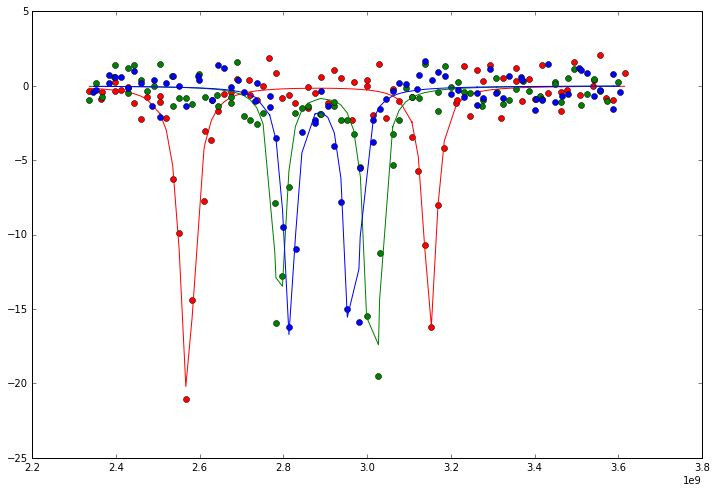

In [113]:
D2_X = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-25-16\Nabond ND on CPW 10mW ODMR position 2 x127 y50 B0_5V T0.txt')
D2_Y = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-25-16\Nabond ND on CPW 10mW ODMR position 2 x127 y50 B0_5V T90.txt')
D2_Z = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-25-16\Nabond ND on CPW 10mW ODMR position 2 x127 y50 B0_5V X15_4 T0.txt')
OrientODMR(D2_X,D2_Y,D2_Z)

Phi: -9.475777 +/- 0.543719
Theta: 62.835611+/- 0.703694
Phi(naive): -5.056000
Theta(naive): 69.114240


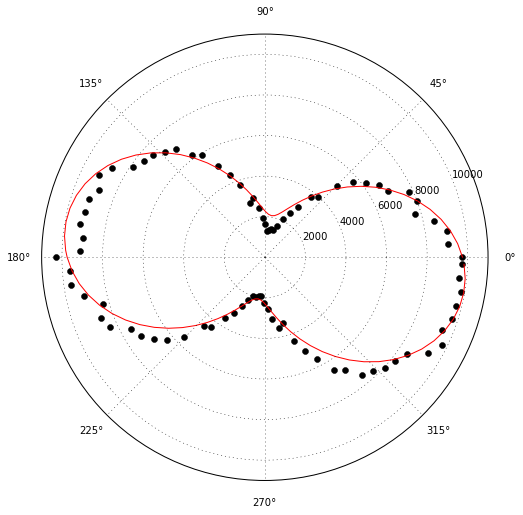

In [117]:
T2 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-25-16\Nabond ND on CPW 1mW ODMR position 2 x127 y50 B0 Rotor Sweep 2.txt')
T2_half = T2[T2[:,0]<180]
T2_half_copy = T2[T2[:,0]<180]
T2_half_copy[:,0] = T2_half_copy[:,0]+180
T2_mirror = np.append(T2_half,T2_half_copy,axis=0)
T2_mirror[:,1] -= 2036
OrientPol(T2_mirror)

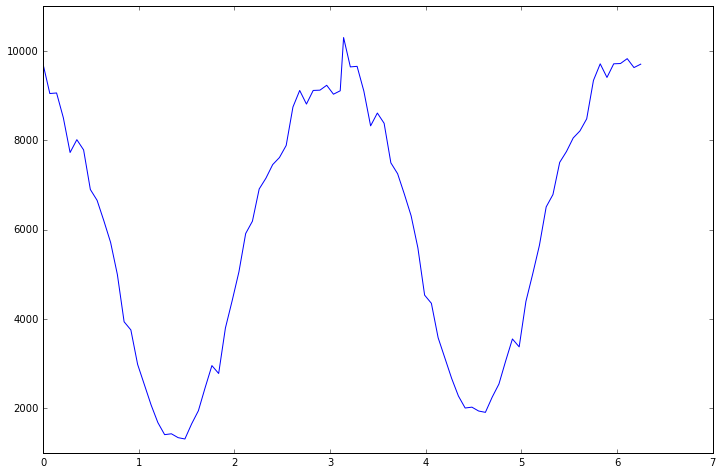

In [95]:
plt.plot(T2_mirror[:,0],T2_mirror[:,1])

In [51]:
np.append(T2_half[:,0]+180,T2_half[:,1])

array([   180.   ,    184.045,    188.09 ,    192.135,    196.18 ,
          200.225,    204.27 ,    208.315,    212.36 ,    216.404,
          220.449,    224.494,    228.539,    232.584,    236.629,
          240.674,    244.719,    248.764,    252.809,    256.854,
          260.899,    264.944,    268.989,    273.034,    277.079,
          281.124,    285.169,    289.213,    293.258,    297.303,
          301.348,    305.393,    309.438,    313.483,    317.528,
          321.573,    325.618,    329.663,    333.708,    337.753,
          341.798,    345.843,    349.888,    353.933,    357.978,
        11742.   ,  11071.   ,  11070.   ,  10502.   ,   9710.   ,
         9984.   ,   9742.   ,   8842.   ,   8585.   ,   8114.   ,
         7616.   ,   6885.   ,   5812.   ,   5616.   ,   4831.   ,
         4363.   ,   3894.   ,   3487.   ,   3204.   ,   3210.   ,
         3110.   ,   3067.   ,   3393.   ,   3674.   ,   4178.   ,
         4658.   ,   4468.   ,   5473.   ,   6072.   ,   6704.

X field: 10.17 +/- 0.05 mT 
Y field: 4.50 +/- 0.06 mT 
Z field: 2.34 +/- 0.04 mT
B: 11.55 +/- 0.10
Phi: 23.87 +/- 0.97
Theta: 74.43


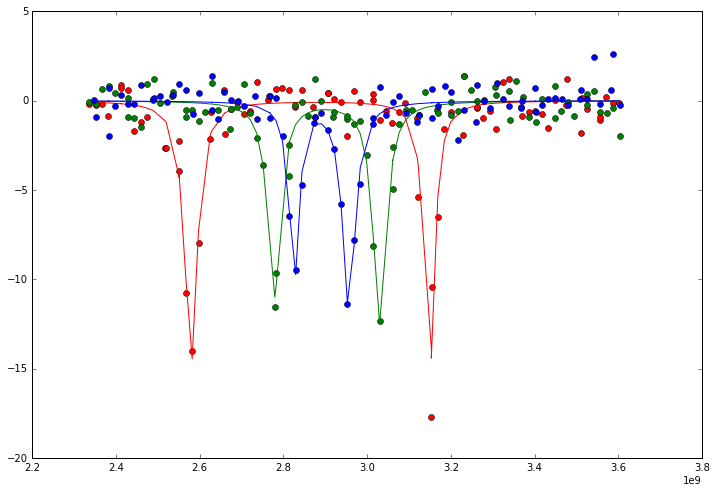

In [114]:
D3_X = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-25-16\Nabond ND on CPW 10mW ODMR position 2 x15 y57 B0_5 T0.txt')
D3_Y = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-25-16\Nabond ND on CPW 10mW ODMR position 2 x15 y57 B0_5 T90.txt')
D3_Z = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-25-16\Nabond ND on CPW 10mW ODMR position 2 x15 y57 B0_5 X15_4 T0.txt')
OrientODMR(D3_X,D3_Y,D3_Z)

Phi: -3.352992 +/- 0.471841
Theta: 60.544851+/- 0.562676
Phi(naive): -5.056000
Theta(naive): 66.096611


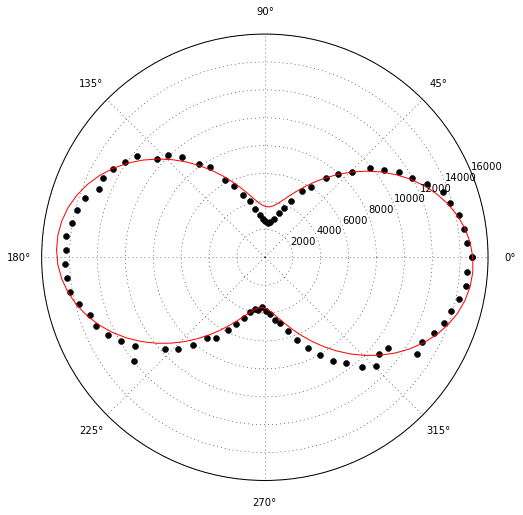

In [118]:
T3 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-25-16\Nabond ND on CPW 1mW ODMR position 2 x15 y57 B0 Rotor Sweep.txt')
T3[:,1] -= 2036
OrientPol(T3)

In [98]:
print "Dot 3 Phi diff %2f or %2f"% (90-86.5-23.9,90-86.5+23.9)
print "Dot 2 Phi diff %2f or %2f"% (90-80.5-21,90-80.5+21)
print "Dot 1 Phi diff %2f or %2f"% (139-90-35.66,139-90+35.66)

Dot 3 Phi diff -20.400000 or 27.400000
Dot 2 Phi diff -11.500000 or 30.500000
Dot 1 Phi diff 13.340000 or 84.660000


In [75]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh import palettes
output_notebook()
TOOLS = "box_zoom,box_select,crosshair,hover,resize,reset"

Loading BokehJS ...

In [93]:

files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\5-25-16\Nabond ND on CPW 10mW ODMR position 2 x15 y57 T23 d2_1*V.txt')
output_file("5-25-16 Dot 3 ODMR.html")
bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
diffs = bsweep[:,1::2]
diffs = np.nan_to_num(diffs)
Bs = np.linspace(0,1.758621,len(files))*(11/0.5)
p1 = figure(x_range=[Bs[0],Bs[-1]], y_range=[bsweep[0,0],bsweep[-2,0]],tools=TOOLS)
p1.image(image=[diffs],x=Bs[0], y=bsweep[0,0], dw=[Bs[-1]], dh=[bsweep[-2,0]-bsweep[0,0]], palette='RdPu9')
p1.line(Bs,2.864E9+28E6*Bs,line_dash=(6,6),line_color='black')
p1.line(Bs,2.864E9-28E6*Bs,line_dash=(6,6),line_color='black')

show(p1)

In [127]:
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\5-25-16\Nabond ND on CPW 10mW ODMR position 2 x127 y50 T21 d2_3*V.txt')
output_file("5-25-16 Dot 3 ODMR.html")
bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
diffs = bsweep[:,1::2]
diffs = np.nan_to_num(diffs)
Bs = np.linspace(0,3,len(files))*(11/0.5)
p1 = figure(x_range=[Bs[0],Bs[-1]], y_range=[bsweep[0,0],bsweep[-2,0]],tools=TOOLS)
p1.image(image=[diffs],x=Bs[0], y=bsweep[0,0], dw=[Bs[-1]], dh=[bsweep[-2,0]-bsweep[0,0]], palette='RdPu9')
p1.line(Bs,2.864E9+28E6*Bs,line_dash=(6,6),line_color='black')
p1.line(Bs,2.864E9-28E6*Bs,line_dash=(6,6),line_color='black')
show(p1)
print Bs*0.5/11

[ 0.          0.10344828  0.20689655  0.31034483  0.4137931   0.51724138
  0.62068966  0.72413793  0.82758621  0.93103448  1.03448276  1.13793103
  1.24137931  1.34482759  1.44827586  1.55172414  1.65517241  1.75862069
  1.86206897  1.96551724  2.06896552  2.17241379  2.27586207  2.37931034
  2.48275862  2.5862069   2.68965517  2.79310345  2.89655172  3.        ]


In [148]:
freq = bsweep[:,2]
fits = np.zeros((diffs.shape[1],6))
for i in range(0,diffs.shape[1]):
    O = diffs[:,i]
    opt, cov = curve_fit(ODMRfit,freq,O,p0=(-4E8,freq[np.argmin(O)],1E7,-4E8,2.87E9*2-freq[np.argmin(O)],1E7),maxfev=2500)
    fits[i,:] = opt

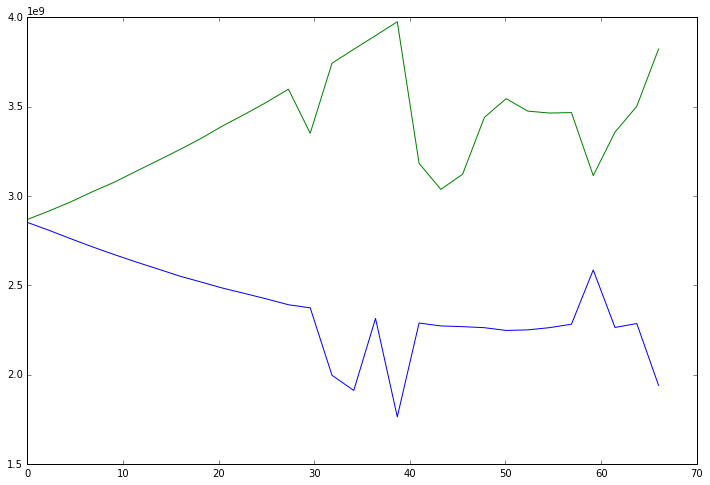

In [157]:
mask = (fits[:,1]<fits[:,4])
mins = fits[:,1]*mask + fits[:,4]*~mask
maxs = fits[:,1]*~mask + fits[:,4]*mask
plt.plot(Bs,mins)
plt.plot(Bs,maxs)

In [158]:
output_notebook()

p1.image(image=[diffs],x=Bs[0], y=bsweep[0,0], dw=[Bs[-1]], dh=[bsweep[-2,0]-bsweep[0,0]], palette='RdPu9')
p1.line(Bs,2.864E9+28E6*Bs,line_dash=(6,6),line_color='black')
p1.line(Bs,2.864E9-28E6*Bs,line_dash=(6,6),line_color='black')
p1.circle(Bs,mins,color='black')
p1.circle(Bs,maxs,color='black')
show(p1)

Loading BokehJS ...

In [178]:
def ODMR_theory_min(B,theta):
    D = 2.86E9
    g = 28E6 #MHz/mT, B should be in mT
    
    f_0 = D + 3*g**2*B**2/(2*D)*np.sin(theta)**2
    f_1 = g*B*np.cos(theta)*np.sqrt( 1 + (g*B/(2*D)*np.tan(theta)*np.sin(theta))**2)
    
    return f_0-f_1

def ODMR_theory_max(B,theta):
    D = 2.86E9
    g = 28E6 #MHz/mT, B should be in mT
    
    f_0 = D + 3*g**2*B**2/(2*D)*np.sin(theta)**2
    f_1 = g*B*np.cos(theta)*np.sqrt( 1 + (g*B/(2*D)*np.tan(theta)*np.sin(theta))**2)
    
    return f_0+f_1

In [188]:
opt, cov = curve_fit(ODMR_theory_min,Bs[0:12],mins[0:12],p0=(np.pi/4))
print "%2f +/- %2f" % (opt*180/np.pi,np.sqrt(np.diag(cov))[0]*180/np.pi)
opt, cov = curve_fit(ODMR_theory_max,Bs,maxs,p0=(0.6))
print "%2f +/- %2f" % (opt*180/np.pi,np.sqrt(np.diag(cov))[0]*180/np.pi)

39.144510 +/- 0.189947
-90.001049 +/- 17728.883364


In [189]:
output_notebook()

p1.image(image=[diffs],x=Bs[0], y=bsweep[0,0], dw=[Bs[-1]], dh=[bsweep[-2,0]-bsweep[0,0]], palette='RdPu9')
p1.line(Bs,ODMR_theory_min(Bs,43*np.pi/180),line_dash=(6,6),line_color='black')
p1.line(Bs,ODMR_theory_max(Bs,43*np.pi/180),line_dash=(6,6),line_color='black')
p1.circle(Bs,mins,color='black')
p1.circle(Bs,maxs,color='black')
show(p1)

Loading BokehJS ...